In [2]:
import numpy as np
import pandas as pd
import time
import datetime
from time import mktime
from datetime import datetime
import geopy

In [3]:
all_data = pd.read_csv(r'/Users/madhavapaliyam/Documents/CMSC/rando/personal_project/atlantic.csv')
all_data = all_data[['ID','Name','Date','Time','Status','Latitude','Longitude','Maximum Wind','Minimum Pressure']]
all_data.sample(5)

ID                 Name      Date  Time Status Latitude  \
13590  AL051918              UNNAMED  19180908     0     EX    48.9N   
18606  AL021937              UNNAMED  19370808     0     TS    41.8N   
23310  AL061953                DOLLY  19530909   600     TS    20.2N   
29022  AL161969                GERDA  19690910     0     HU    44.0N   
42182  AL042002                DOLLY  20020902   600     TS    17.1N   

      Longitude  Maximum Wind  Minimum Pressure  
13590     56.5W            40              -999  
18606     66.4W            50              -999  
23310     69.0W            45              -999  
29022     67.5W            95               979  
42182     52.5W            40              1001

In [4]:
TIME = []
for entry in all_data.iterrows():
    try:
        if entry[1].Time == 0: 
            TIME.append(datetime.strptime(str(entry[1].Date)+' '+str(entry[1].Time),'%Y%m%d %H'))
        else:
            TIME.append(datetime.strptime(str(entry[1].Date)+' '+str(entry[1].Time),'%Y%m%d %H%M'))
    except:
        TIME.append(np.nan)
        continue

In [5]:
len(TIME) == len(all_data)

True

In [6]:
all_data = all_data[['ID','Name','Status','Latitude','Longitude','Maximum Wind','Minimum Pressure']]
all_data['TIME'] = TIME
all_data.tail()

ID                 Name Status Latitude Longitude  Maximum Wind  \
49100  AL122015                 KATE     EX    41.3N     50.4W            55   
49101  AL122015                 KATE     EX    41.9N     49.9W            55   
49102  AL122015                 KATE     EX    41.5N     49.2W            50   
49103  AL122015                 KATE     EX    40.8N     47.5W            45   
49104  AL122015                 KATE     EX    40.7N     45.4W            45   

       Minimum Pressure                TIME  
49100               981 2015-11-12 12:00:00  
49101               983 2015-11-12 18:00:00  
49102               985 2015-11-13 00:00:00  
49103               985 2015-11-13 06:00:00  
49104               987 2015-11-13 12:00:00

In [7]:
from collections import defaultdict
def get_year():
    years = defaultdict(list)
    for entry in all_data.iterrows():
        years[entry[1].TIME.year].append(entry[1].ID)
    yearz = {}
    each_yr = []
    for key in years:
        each_yr.append(key)
        yearz[key] = set(years[key])
    num_hurricanes = []
    for x in yearz.values(): 
        num_hurricanes.append(len(x))
    return (each_yr, num_hurricanes)
def get_months():
    months = defaultdict(list)
    for entry in all_data.iterrows():
        months[entry[1].TIME.month].append(entry[1].ID)
    m = {}
    each_month = []
    for key in months:
        each_month.append(key)
        m[key] = set(months[key])
    num_hurricanes = []
    for x in m.values(): 
        num_hurricanes.append(len(x))
    return (each_month, num_hurricanes)



In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
year_info = get_year()
plt.plot(year_info[0], year_info[1])
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.title('Number of Hurricanes in the Atlantic')

Text(0.5, 1.0, 'Number of Hurricanes in the Atlantic')

Text(0.5, 1.0, 'Hurricanes by Month')

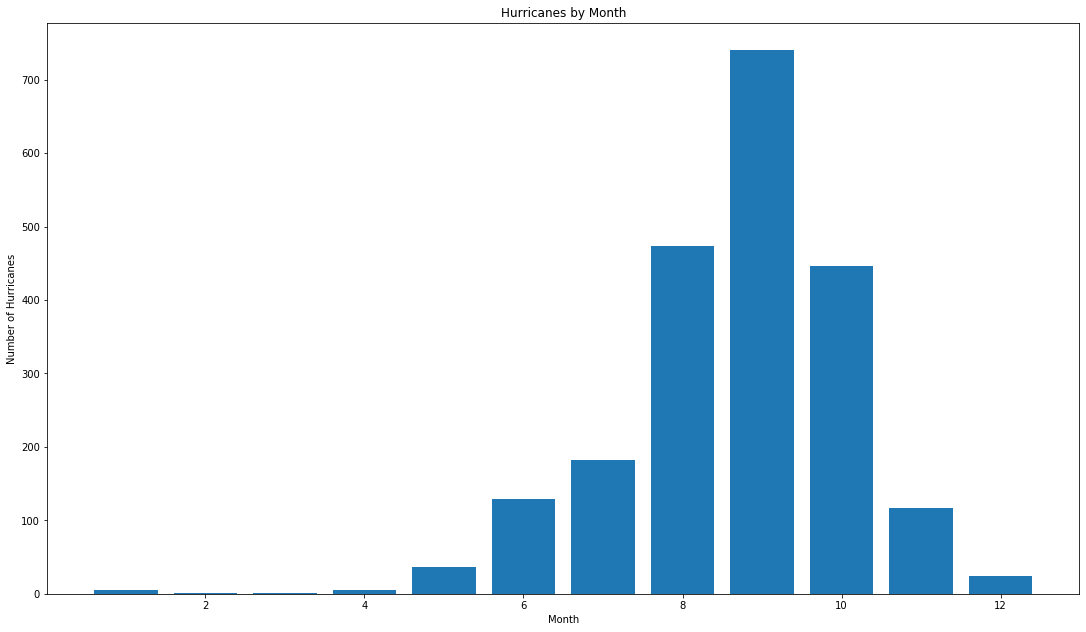

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
month_info = get_months()
plt.bar(month_info[0], month_info[1])
plt.xlabel('Month')
plt.ylabel('Number of Hurricanes')
plt.title('Hurricanes by Month')

In [10]:
import re
new_lat = []
new_long = []
for entry in all_data.iterrows(): 
    match = re.search('\d+.\d+', entry[1]['Latitude'])
    match2 = re.search('\d+.\d+', entry[1]['Longitude'])
    new_lat.append(float(match.group()))
    new_long.append(float('-'+match2.group()))
all_data['Longitude'] = new_long
all_data['Latitude'] = new_lat
long = all_data.groupby('ID')['Longitude'].apply(list)
lat = all_data.groupby('ID')['Latitude'].apply(list)

In [11]:
print("Are lat and long the same length? " + str(len(lat)==len(long)))
print(lat.head())
print(long.head())

Are lat and long the same length? True
ID
AL011851    [28.0, 28.0, 28.0, 28.1, 28.2, 28.2, 28.3, 28....
AL011852    [20.5, 20.7, 20.9, 21.1, 21.2, 21.5, 21.7, 21....
AL011853                                               [32.5]
AL011854    [26.0, 26.0, 26.0, 26.0, 26.0, 26.1, 26.2, 26....
AL011855                                               [22.2]
Name: Latitude, dtype: object
ID
AL011851    [-94.8, -95.4, -96.0, -96.5, -96.8, -97.0, -97...
AL011852    [-67.1, -68.0, -68.8, -69.6, -70.6, -71.9, -73...
AL011853                                              [-69.0]
AL011854    [-92.5, -93.0, -93.5, -94.0, -94.7, -95.7, -97...
AL011855                                              [-98.0]
Name: Longitude, dtype: object


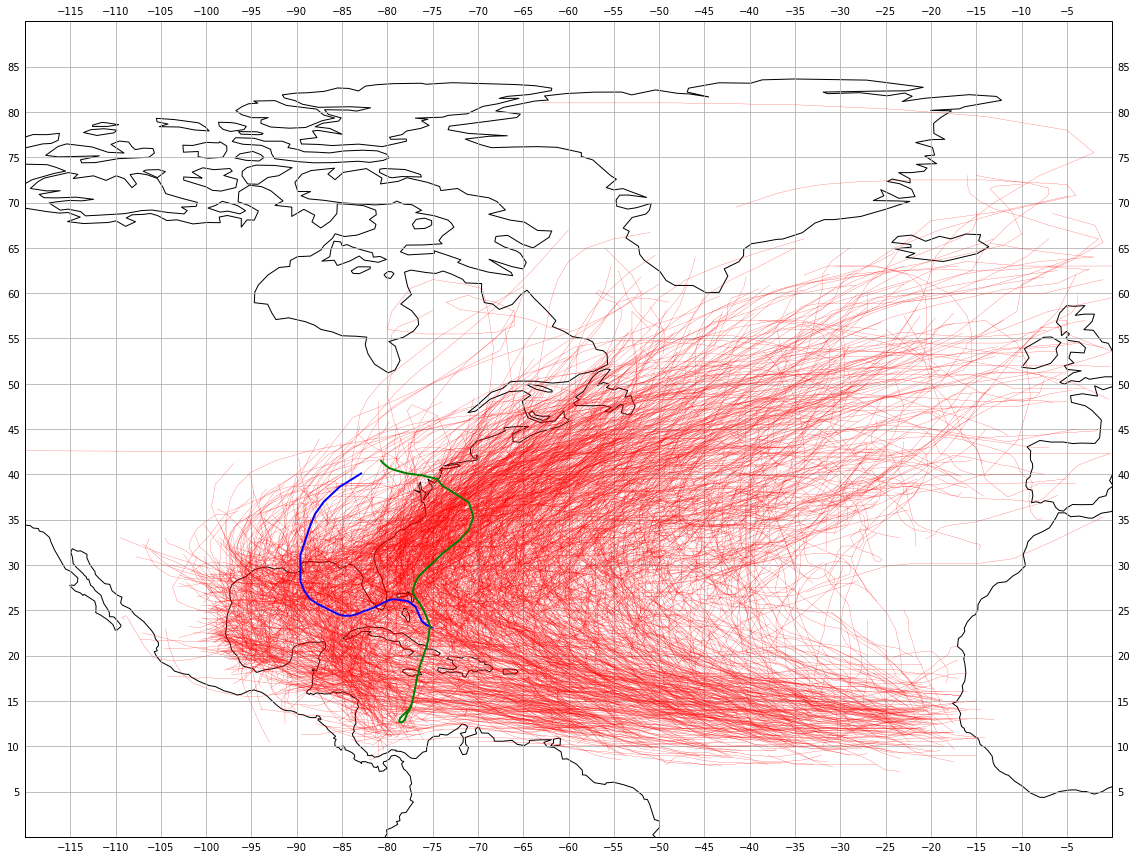

In [12]:
import matplotlib
import cartopy.crs as ccrs
import cartopy
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([-120,0,90,0], ccrs.PlateCarree())
ax.gridlines(xlocs=range(-120,5,5), ylocs=range(0,100,5),draw_labels=True)
ax.coastlines()
for index in range(len(lat)):
    if (lat.index[index] == 'AL122005'):
        ax.plot(long[index],lat[index],'b-',linewidth=2)
    elif (lat.index[index] == 'AL182012'):
        ax.plot(long[index],lat[index],'g-',linewidth=2)
    else:
        ax.plot(long[index],lat[index],'r-',linewidth=0.2)
plt.show()

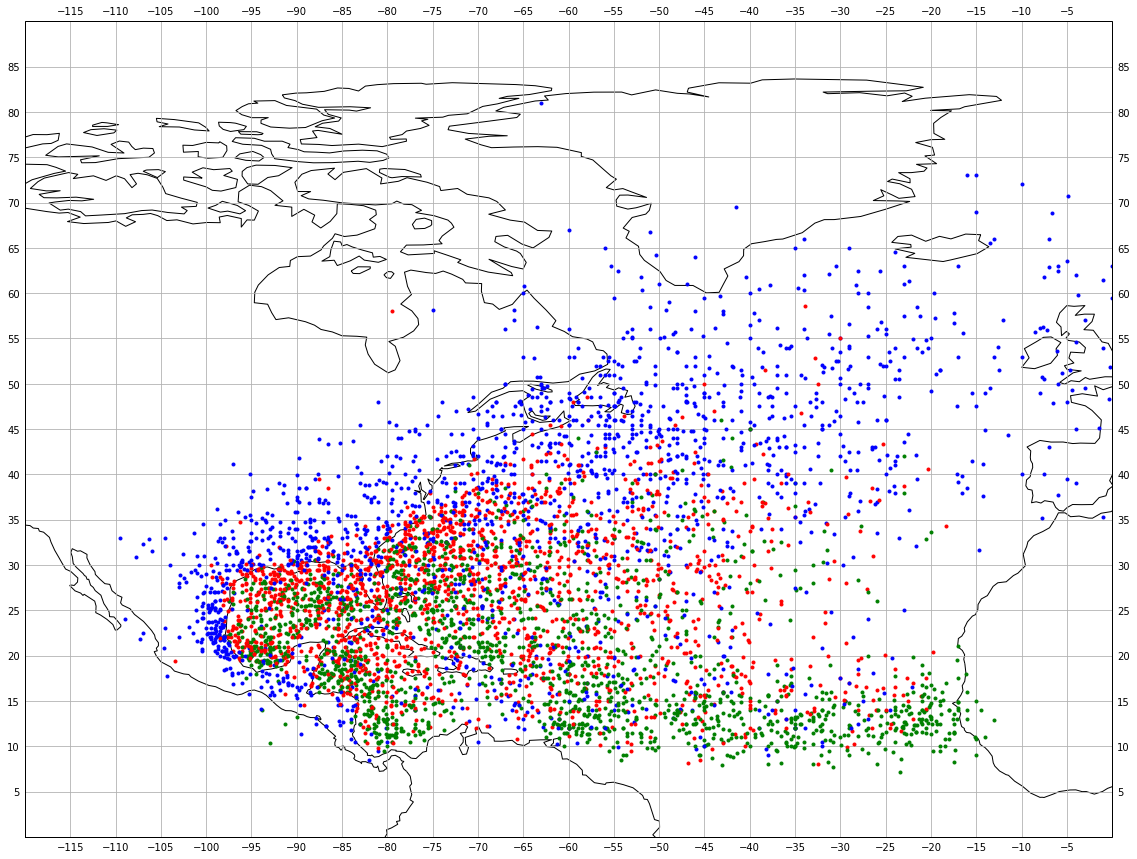

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([-120,0,90,0], ccrs.PlateCarree())
ax.gridlines(xlocs=range(-120,5,5), ylocs=range(0,100,5),draw_labels=True)
ax.coastlines()
start_mid_end = pd.DataFrame(columns=['id', 'start_long','start_lat', 'mid_long','mid_lat','death_long','death_lat'])
for index in range(len(lat)):
    l = int(len(long[index])/2)
    ax.plot(long[index][l],lat[index][l],'ro',markersize=3)
    ax.plot(long[index][-1],lat[index][-1],'bo',markersize=3)
    ax.plot(long[index][0],lat[index][0],'go',markersize=3)
    start_mid_end = start_mid_end.append({'id':long.index[index], 'start_long':long[index][0],'start_lat':lat[index][0], 'mid_long':long[index][l],'mid_lat':lat[index][l],'death_long':long[index][-1],'death_lat':lat[index][-1]},ignore_index=True)  
plt.show()




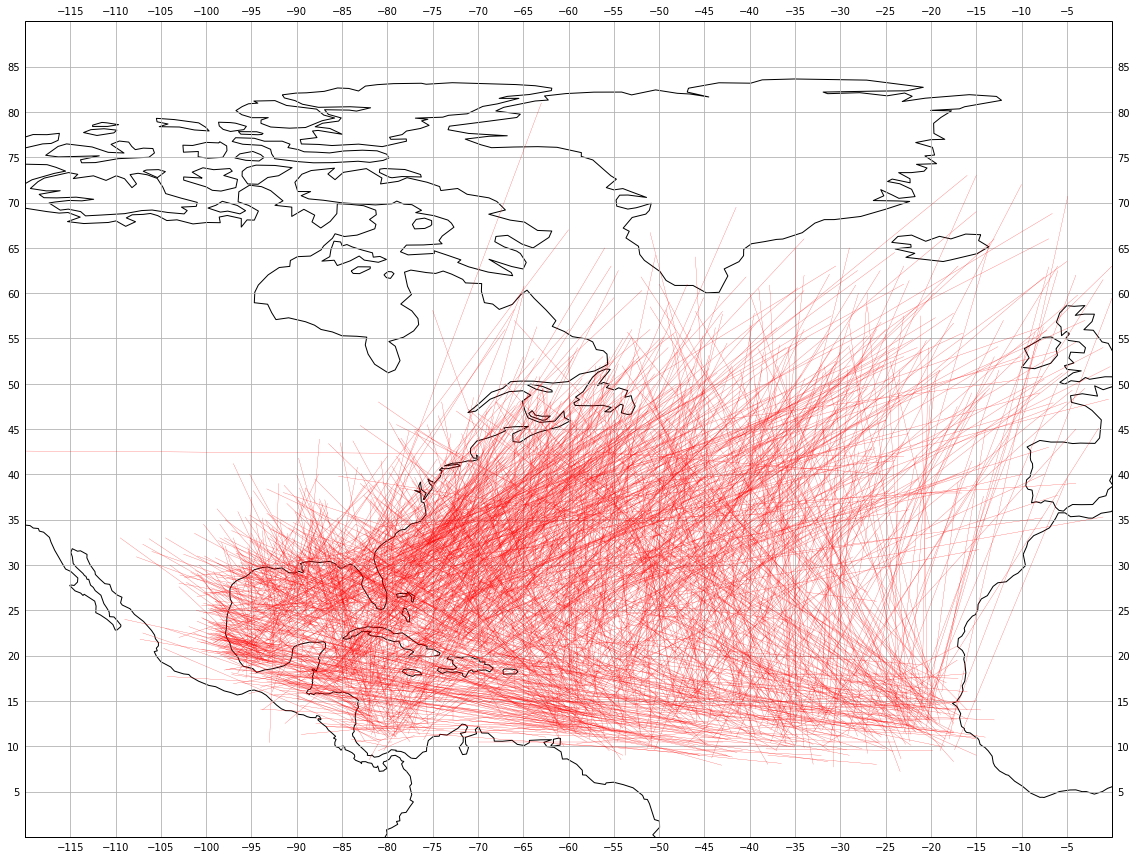

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([-120,0,90,0], ccrs.PlateCarree())
ax.gridlines(xlocs=range(-120,5,5), ylocs=range(0,100,5),draw_labels=True)
ax.coastlines()
slope = []
for index in range(len(lat)):
    ax.plot([long[index][0],long[index][-1]],[lat[index][0],lat[index][-1]],'r-',linewidth=0.2)
    if (long[index][-1]-long[index][0] == 0):
        slope.append(None)
    else:
        slope.append((lat[index][-1] - lat[index][0])/(long[index][-1] - long[index][0]))
all_slopes = pd.Series(data=slope,index=lat.index)
plt.show()

In [16]:
from geopy.distance import geodesic
dist = []
for index in range(len(lat)):
    d = 0
    for pos in range(len(lat[index])-1):
        p1 = (lat[index][pos], long[index][pos])
        p2 = (lat[index][pos+1], long[index][pos])
        d = d + geodesic(p1,p2).miles
    dist.append(d)
all_dist = pd.Series(data=dist,index=lat.index)
len(all_dist) == len(all_slopes)

True

In [17]:
slope_dist = pd.concat([all_dist, all_slopes], axis=1)
slope_dist.columns =['distance traveled','slope']
slope_dist

distance traveled      slope
ID                                    
AL011851         206.626163  -0.555556
AL011852        1412.285579 -22.777778
AL011853           0.000000        NaN
AL011854         137.700314  -0.190476
AL011855           0.000000        NaN
...                     ...        ...
AL282005         440.044942  -0.102804
AL291969         123.707037   1.800000
AL292005        1948.768778   0.176596
AL302005        1157.293114  -0.680000
AL312005         715.752804  -0.119403

[1814 rows x 2 columns]

(-25, 25)

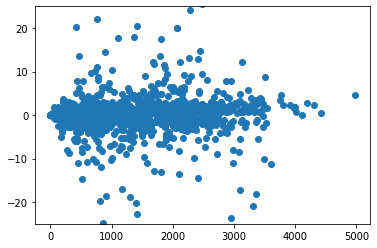

In [18]:
plt.scatter(slope_dist['distance traveled'], slope_dist['slope'])
plt.ylim(-25,25)


In [29]:
start_mid_end

id  start_long  start_lat  mid_long  mid_lat  death_long  \
0     AL011851       -94.8       28.0     -98.3     28.4      -100.2   
1     AL011852       -67.1       20.5     -87.1     27.7       -68.0   
2     AL011853       -69.0       32.5     -69.0     32.5       -69.0   
3     AL011854       -92.5       26.0     -95.7     26.1      -103.0   
4     AL011855       -98.0       22.2     -98.0     22.2       -98.0   
...        ...         ...        ...       ...      ...         ...   
1809  AL282005       -62.1       13.2     -84.1     15.8       -83.5   
1810  AL291969       -81.0       10.3     -81.0      9.8       -82.0   
1811  AL292005       -48.0       27.0     -38.9     24.6        -1.0   
1812  AL302005       -49.2       31.5     -39.8     34.3       -39.2   
1813  AL312005       -35.6       23.9     -41.6     23.2       -55.7   

      death_lat  
0          31.0  
1          41.0  
2          32.5  
3          28.0  
4          22.2  
...         ...  
1809       15.4  
1810        8.5  
1811       35.3  
1812       24.7  
1813       26.3  

[1814 rows x 7 columns]

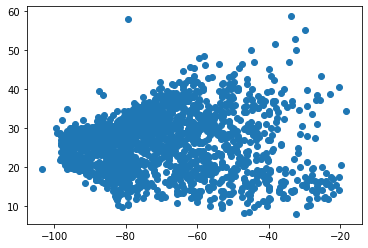

In [38]:
plt.scatter(start_mid_end['mid_long'], start_mid_end['mid_lat'])
plt.show()

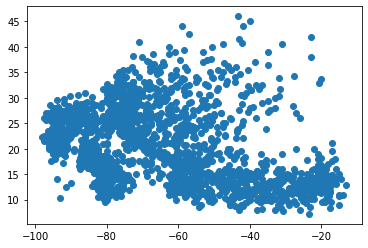

In [39]:
plt.scatter(start_mid_end['start_long'], start_mid_end['start_lat'])
plt.show()

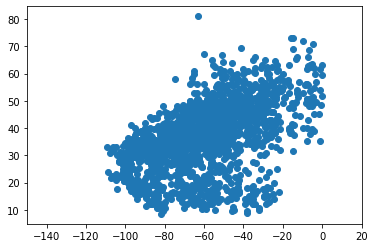

In [147]:
plt.scatter(start_mid_end['death_long'], start_mid_end['death_lat'])
plt.show()

In [42]:
from sklearn.cluster import AgglomerativeClustering
from collections import defaultdict

In [159]:
def doAgglo(X, num_clusters):
    model = AgglomerativeClustering(n_clusters=num_clusters, affinity = 'euclidean', linkage = 'ward')
    labels = model.fit_predict(X)
    return (labels)
def get_plot(X1,X2,lab,t):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(X1,X2,c=lab, s=50)
    plt.xlim(-120,0)
    plt.ylim(0,90)
    plt.title(str(t) + ' Clusters')
def c_mean_2(vals,labels,n_clusters):
    sorter = defaultdict(list)
    for index in range(len(labels)): 
        sorter[labels[index]].append(vals[index])
    some = 0
    for cluster_num in range(n_clusters): 
        arr = np.asarray(sorter[cluster_num])
        some = some + np.sum(np.square(np.asarray(arr) - np.mean(arr)))
    return some/len(vals)
    
            

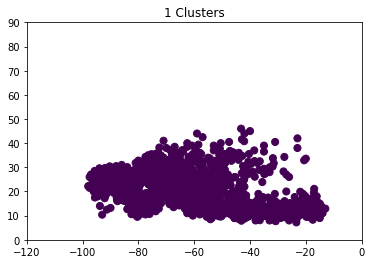

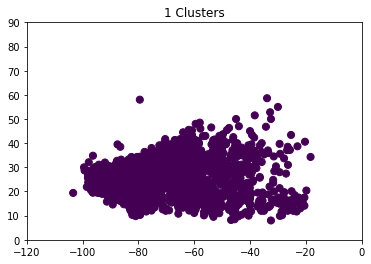

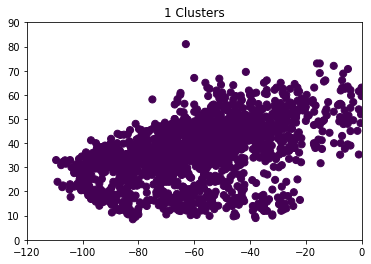

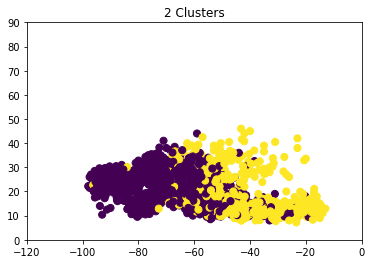

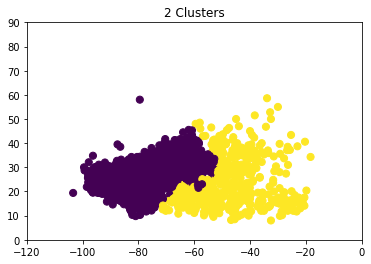

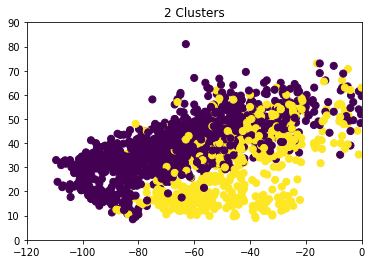

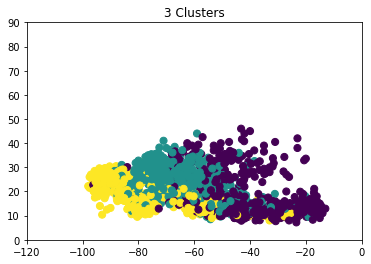

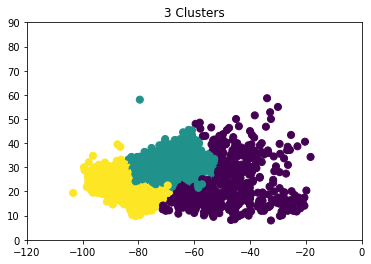

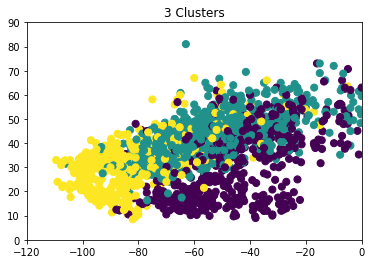

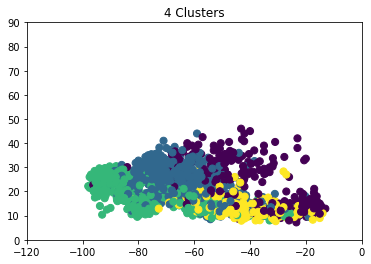

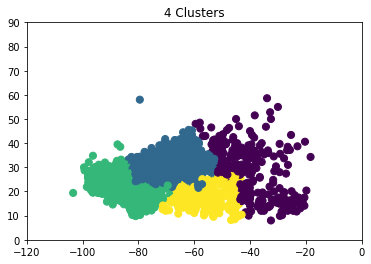

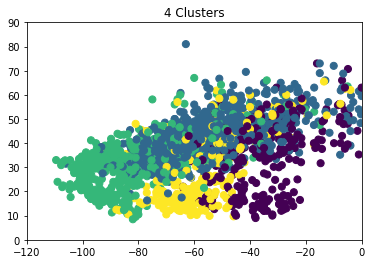

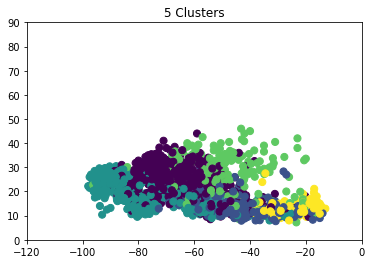

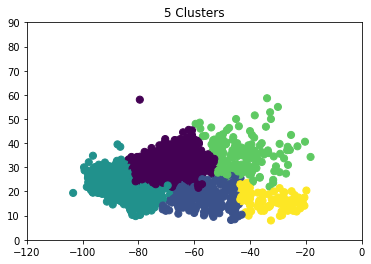

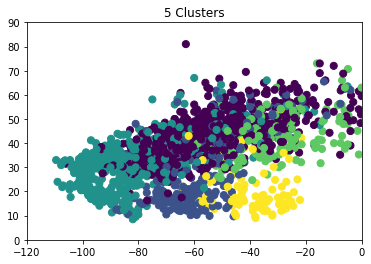

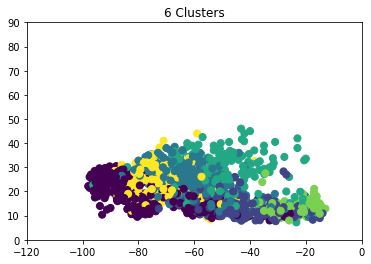

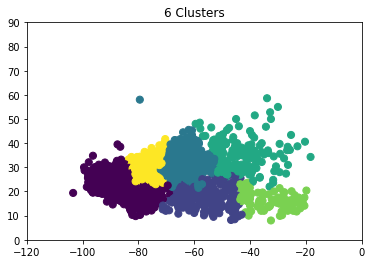

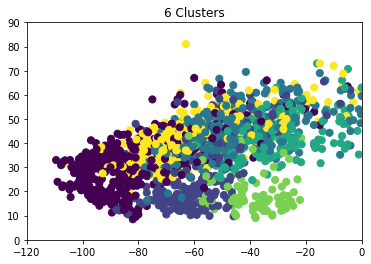

In [163]:
err = []
for i in range(1,7):
    temp = 0
    lab = doAgglo(start_mid_end[['mid_long','mid_lat']],i)
    get_plot(start_mid_end['start_long'],start_mid_end['start_lat'],lab,i)
    get_plot(start_mid_end['mid_long'],start_mid_end['mid_lat'],lab,i)
    get_plot(start_mid_end['death_long'],start_mid_end['death_lat'],lab,i)
    temp = temp + c_mean_2(start_mid_end['mid_long'],lab,i)
    temp = temp + c_mean_2(start_mid_end['mid_lat'],lab,i)
    temp = temp + c_mean_2(start_mid_end['start_long'],lab,i)
    temp = temp + c_mean_2(start_mid_end['start_lat'],lab,i)
    temp = temp + c_mean_2(start_mid_end['death_long'],lab,i)
    temp = temp + c_mean_2(start_mid_end['death_lat'],lab,i)
    err.append(temp)



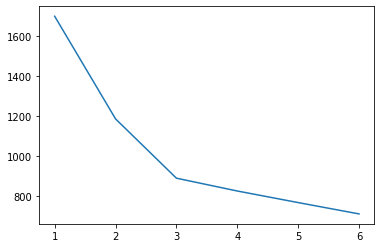

In [164]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1,7),err)

In [190]:
lab = doAgglo(start_mid_end[['mid_long','mid_lat']],3)
df0 = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
for index in range(len(start_mid_end)):
    if (lab[index] == 0): 
        df0 = df0.append({'id':start_mid_end['id'][index],'lats':lat[start_mid_end['id'][index]], 'longs':long[start_mid_end['id'][index]]},ignore_index=True)
    elif (lab[index] == 1): 
        df1 = df1.append({'id':start_mid_end['id'][index],'lats':lat[start_mid_end['id'][index]], 'longs':long[start_mid_end['id'][index]]},ignore_index=True)
    elif (lab[index] == 2): 
        df2 = df2.append({'id':start_mid_end['id'][index],'lats':lat[start_mid_end['id'][index]], 'longs':long[start_mid_end['id'][index]]},ignore_index=True)  
        
        
        
        
        

In [192]:
len(df1) + len(df0) + len(df2)

1814

In [194]:
df0.head()

id                                               lats  \
0  AL011863   [37.7, 38.5, 39.2, 39.8, 40.3, 40.9, 41.5, 42.0]   
1  AL011869                           [40.5, 41.5, 42.5, 43.5]   
2  AL011876  [39.0, 39.5, 40.0, 40.7, 41.5, 42.4, 43.0, 43....   
3  AL011882                     [37.5, 38.5, 40.0, 42.0, 45.0]   
4  AL011884  [38.5, 40.0, 41.5, 43.5, 45.8, 48.3, 50.0, 50....   

                                               longs  
0  [-50.8, -50.5, -50.0, -49.3, -48.5, -47.7, -46...  
1                       [-47.5, -46.8, -46.0, -45.0]  
2  [-60.8, -60.4, -60.0, -59.3, -58.3, -57.2, -56...  
3                [-52.0, -52.0, -51.5, -50.5, -49.0]  
4  [-62.5, -61.7, -60.7, -58.8, -56.3, -53.1, -50...

In [195]:
df1.head()

id                                               lats  \
0  AL011853                                             [32.5]   
1  AL011857   [34.0, 34.5, 35.0, 35.2, 35.4, 35.5, 35.8, 36.0]   
2  AL011861  [15.1, 15.5, 15.8, 16.2, 16.7, 17.4, 18.0, 18....   
3  AL011862  [32.0, 32.5, 33.0, 33.3, 33.5, 33.9, 34.2, 34....   
4  AL011864  [30.8, 31.8, 33.0, 34.5, 36.0, 37.3, 38.5, 39....   

                                               longs  
0                                            [-69.0]  
1  [-74.5, -73.8, -72.6, -71.4, -70.1, -68.9, -67...  
2  [-58.5, -59.3, -60.1, -60.9, -61.6, -62.4, -63...  
3  [-75.6, -75.3, -75.0, -74.6, -74.4, -74.1, -73...  
4  [-76.0, -75.1, -74.0, -72.4, -69.8, -67.0, -64...

In [196]:
df2.head()

id                                               lats  \
0  AL011851  [28.0, 28.0, 28.0, 28.1, 28.2, 28.2, 28.3, 28....   
1  AL011852  [20.5, 20.7, 20.9, 21.1, 21.2, 21.5, 21.7, 21....   
2  AL011854  [26.0, 26.0, 26.0, 26.0, 26.0, 26.1, 26.2, 26....   
3  AL011855                                             [22.2]   
4  AL011856  [25.0, 25.7, 26.3, 27.0, 27.7, 28.2, 28.7, 29....   

                                               longs  
0  [-94.8, -95.4, -96.0, -96.5, -96.8, -97.0, -97...  
1  [-67.1, -68.0, -68.8, -69.6, -70.6, -71.9, -73...  
2  [-92.5, -93.0, -93.5, -94.0, -94.7, -95.7, -97...  
3                                            [-98.0]  
4  [-83.9, -85.1, -86.5, -87.8, -89.1, -89.8, -90...

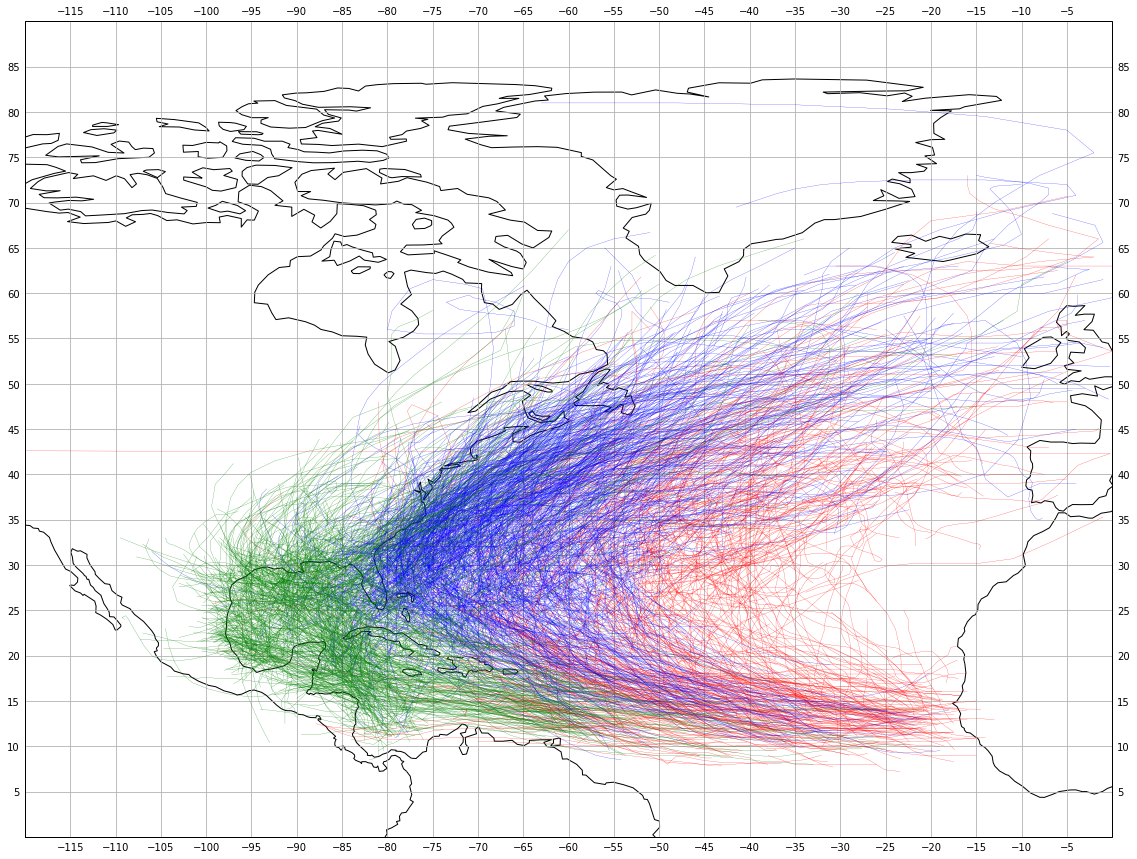

In [212]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([-120,0,90,0], ccrs.PlateCarree())
ax.gridlines(xlocs=range(-120,5,5), ylocs=range(0,100,5),draw_labels=True)
ax.coastlines()
for index in range(len(df0)):
    ax.plot(df0['longs'][index],df0['lats'][index],'r-',linewidth=0.2)
for index in range(len(df1)):
    ax.plot(df1['longs'][index],df1['lats'][index],'b-',linewidth=0.2)
for index in range(len(df2)):
    ax.plot(df2['longs'][index],df2['lats'][index],'g-',linewidth=0.2)

plt.show()

In [534]:
def f_transf(lati,longi): 
    if (lati < 90) and (lati >= 0) and (longi < 0) and (longi > -120):
        return (int(lati) * 121) + int((-longi))
    else: 
        return None
def index_to_coord(index):
    return((index/121),(-(index%121)))    

In [535]:
def make_markhov_values(data, mat_in, f_tranf):
    for coord_list in data.iterrows():
        l = len(coord_list[1]['lats'])
        for index in range(l-1):
            pos = f_tranf(coord_list[1]['lats'][index],coord_list[1]['longs'][index])
            pos_pr = f_tranf(coord_list[1]['lats'][index + 1],coord_list[1]['longs'][index + 1])
            if (pos == None) or (pos_pr == None):
                break
            mat_in[pos][pos_pr] = mat_in[pos][pos_pr] + 1
        pos1 = f_tranf(coord_list[1]['lats'][-1],coord_list[1]['longs'][-1])
        if (pos1 != None):
            mat_in[pos1][-1] = mat_in[pos1][-1] + 1
    return mat_in
def fix_probability(mat_in):        
    for i in range(len(mat_in)): 
        if sum(mat_in[i]) == 0:
            mat_in[i][-1] = 1
        l = mat_in[i]/sum(mat_in[i])
        mat_in[i] = l
    return mat_in
                

In [536]:
def generate(matrix, start_lat, start_long,f_to, f_back):
    path = []
    dead_hur = False 
    curr_index = f_to(start_lat,start_long)
    path.append(f_back(curr_index))
    while not dead_hur: 
        arr = (np.random.choice(range(0,len(mat)), 1, p=mat[curr_index]))
        curr_index = arr[0]
        if (curr_index != len(mat) - 1): 
            path.append(f_back(curr_index))
        else: 
            dead_hur = True
    return path

In [537]:
size = 121 * 90

mat0 = np.zeros(shape=(size,size))
mat0 = make_markhov_values(df0,mat0,f_transf)
mat0 = fix_probability(mat0)

mat1 = np.zeros(shape=(size,size))
mat1 = make_markhov_values(df1,mat1,f_transf)
mat1 = fix_probability(mat1)

mat2 = np.zeros(shape=(size,size))
mat2 = make_markhov_values(df2,mat2,f_transf)
mat2 = fix_probability(mat2)

In [538]:
def make_predict(actual_longs,actual_lats, num, matrix):
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 15)
    ax = plt.axes(projection = ccrs.PlateCarree())
    ax.set_extent([-120,0,90,0], ccrs.PlateCarree())
    ax.gridlines(xlocs=range(-120,5,5), ylocs=range(0,100,5),draw_labels=True)
    ax.coastlines()
    start_lat = actual_lats[0]
    start_long = actual_longs[0]
    for i in range(num): 
        arr = list(map(list, zip(*generate(matrix,start_lat,start_long,f_transf,index_to_coord))))
        ax.plot(arr[1],arr[0])
    ax.plot(actual_longs,actual_lats,'bo',markersize=3)
    plt.show()


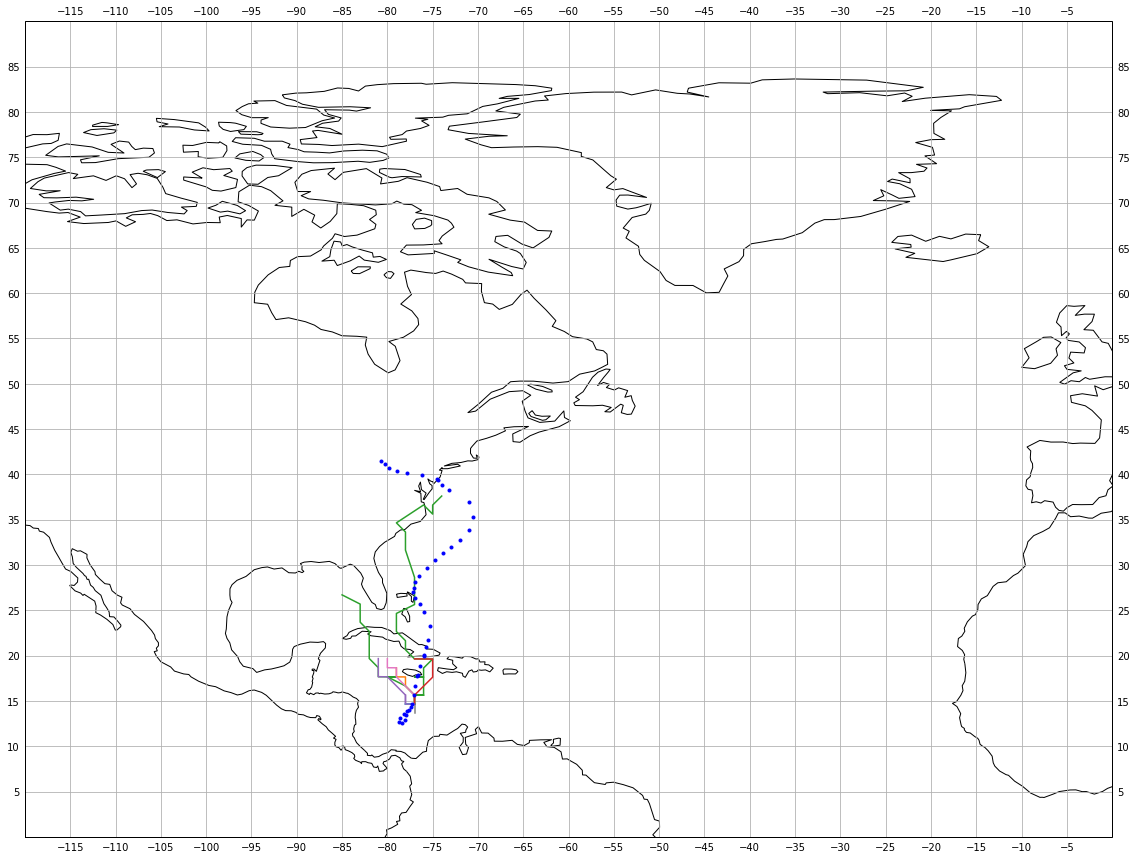

In [542]:
sandy = df1.loc[df1['id'] == 'AL182012']
make_predict(list(sandy['longs'])[0],list(sandy['lats'])[0],15,mat1)